In [1]:
# ================================================
# ML Modeling and Country Pollution Classification (Robust Column Handling)
# ================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import re


In [2]:

# ===============================
# Step 1 - Load dataset
# ===============================
df = pd.read_csv('Ireland_dataset.csv')

print("Original Columns:", df.columns.tolist())

# Clean up column names (replace symbols, spaces, etc.)
def clean_column_names(cols):
    clean_cols = []
    for c in cols:
        c = c.strip().lower()
        c = re.sub(r"[^\w]+", "_", c)  # replace /, (), spaces with _
        c = re.sub(r"_+", "_", c).strip("_")  # remove double underscores
        clean_cols.append(c)
    return clean_cols

df.columns = clean_column_names(df.columns)
print("Cleaned Columns:", df.columns.tolist())


Original Columns: ['Country', 'Area', 'Waterbody Type', 'Date', 'Ammonia (mg/l)', 'Biochemical Oxygen Demand (mg/l)', 'Dissolved Oxygen (mg/l)', 'Orthophosphate (mg/l)', 'pH (ph units)', 'Temperature (cel)', 'Nitrogen (mg/l)', 'Nitrate (mg/l)', 'CCME_Values', 'CCME_WQI']
Cleaned Columns: ['country', 'area', 'waterbody_type', 'date', 'ammonia_mg_l', 'biochemical_oxygen_demand_mg_l', 'dissolved_oxygen_mg_l', 'orthophosphate_mg_l', 'ph_ph_units', 'temperature_cel', 'nitrogen_mg_l', 'nitrate_mg_l', 'ccme_values', 'ccme_wqi']


In [3]:

# ===============================
# Step 2 - Define predictors & target
# ===============================
expected_cols = [
    'ammonia_mg_l', 'biochemical_oxygen_demand_mg_l', 'dissolved_oxygen_mg_l',
    'orthophosphate_mg_l', 'ph_ph_units', 'temperature_cel',
    'nitrogen_mg_l', 'nitrate_mg_l', 'ccme_values', 'ccme_wqi', 'country'
]

missing = [col for col in expected_cols if col not in df.columns]
if missing:
    print(f"⚠️ Warning: Missing columns {missing}")
else:
    print("✅ All expected columns found.")

X = df[['ammonia_mg_l', 'biochemical_oxygen_demand_mg_l', 'dissolved_oxygen_mg_l',
        'orthophosphate_mg_l', 'ph_ph_units', 'temperature_cel',
        'nitrogen_mg_l', 'nitrate_mg_l']]
y = df['ccme_values']

# Drop missing
df = df.dropna(subset=X.columns.tolist() + ['ccme_values'])
X = df[X.columns]
y = df['ccme_values']


✅ All expected columns found.


In [4]:

# ===============================
# Step 3 - Split data
# ===============================
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


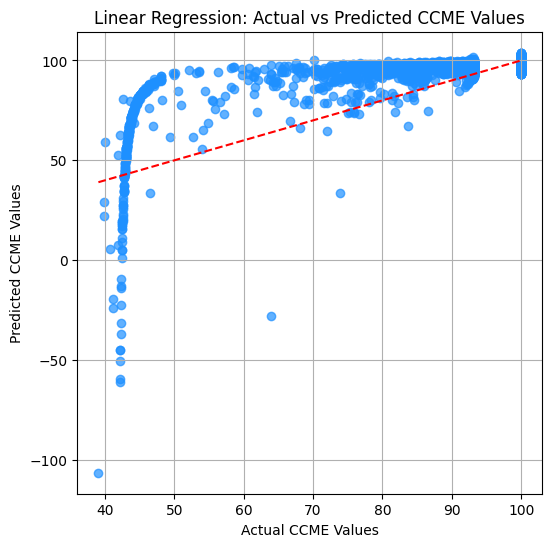

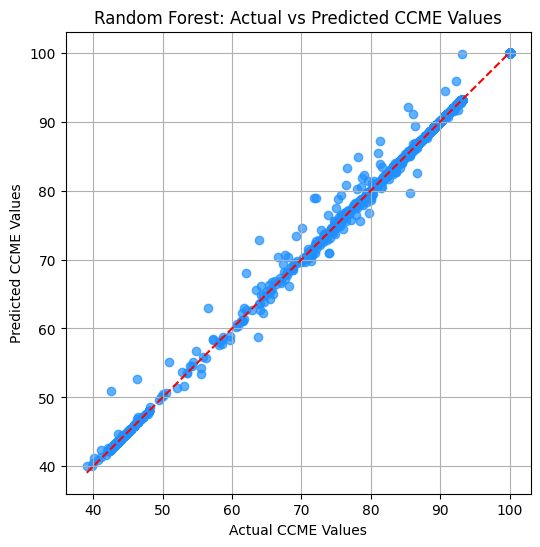

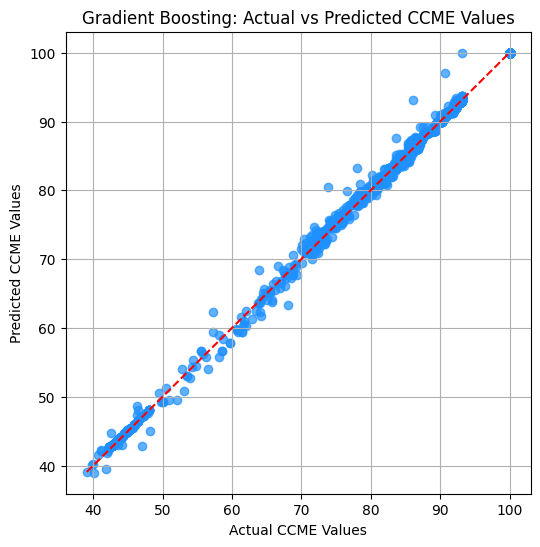

In [5]:

# ===============================
# Step 4 - Train regression models
# ===============================
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    metrics = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Validation R²": r2_score(y_val, y_val_pred),
        "Test R²": r2_score(y_test, y_test_pred),
        "MAE": mean_absolute_error(y_test, y_test_pred),
        "MSE": mean_squared_error(y_test, y_test_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred))
    }
    results[name] = metrics

    # Plot Actual vs Predicted
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_test_pred, color='dodgerblue', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{name}: Actual vs Predicted CCME Values")
    plt.xlabel("Actual CCME Values")
    plt.ylabel("Predicted CCME Values")
    plt.grid(True)
    plt.show()


In [6]:

# ===============================
# Step 5 - Display metrics
# ===============================
print("\n=== MODEL PERFORMANCE SUMMARY ===")
for name, metrics in results.items():
    print(f"\n{name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



=== MODEL PERFORMANCE SUMMARY ===

Linear Regression
  Train R²: 0.4919
  Validation R²: 0.4624
  Test R²: 0.4763
  MAE: 2.4474
  MSE: 21.8407
  RMSE: 4.6734

Random Forest
  Train R²: 0.9999
  Validation R²: 0.9993
  Test R²: 0.9993
  MAE: 0.0094
  MSE: 0.0302
  RMSE: 0.1738

Gradient Boosting
  Train R²: 0.9996
  Validation R²: 0.9994
  Test R²: 0.9994
  MAE: 0.0310
  MSE: 0.0237
  RMSE: 0.1539


Unique countries in dataset: ['Canada' 'England' 'China' 'USA' 'Ireland']

Cluster summary (numeric means):
         Ammonia (mg/l)  Biochemical Oxygen Demand (mg/l)  \
cluster                                                     
0              3.494350                         10.922072   
1              0.086499                          2.067903   

         Dissolved Oxygen (mg/l)  Orthophosphate (mg/l)  pH (ph units)  \
cluster                                                                  
0                      10.032466               2.008973       7.651666   
1                       9.996542               0.104049       7.775284   

         Temperature (cel)  Nitrogen (mg/l)  Nitrate (mg/l)  CCME_Values  
cluster                                                                   
0                12.670459         9.050387        7.677545    66.461439  
1                11.451200         3.415810        3.407442    93.726190  


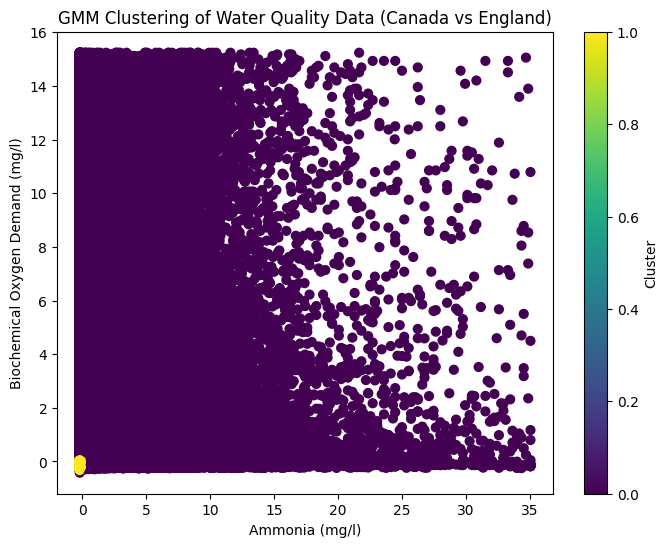


Pollution classification (higher = more polluted):
Country
Canada     0.755888
England    0.383161
USA        0.143009
Ireland    0.092214
China      0.013088
Name: cluster, dtype: float64


In [8]:
# ===========================================
# FINAL STEP: Recreate X_scaled, cluster, and summarize
# ===========================================
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


# Load the correct combined dataset
df = pd.read_csv("Combined_dataset.csv")

# Check the unique countries
print("Unique countries in dataset:", df["Country"].unique())


from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Define predictors
X = df[['Ammonia (mg/l)', 'Biochemical Oxygen Demand (mg/l)', 'Dissolved Oxygen (mg/l)',
        'Orthophosphate (mg/l)', 'pH (ph units)', 'Temperature (cel)',
        'Nitrogen (mg/l)', 'Nitrate (mg/l)']]


# Drop missing or invalid rows
X = X.dropna()
df_clean = df.loc[X.index].copy()

# Scale predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Gaussian Mixture Model for 2 clusters (Canada vs England pollution grouping)
gmm = GaussianMixture(n_components=2, random_state=42)
clusters = gmm.fit_predict(X_scaled)

# Add cluster labels
df_clean["cluster"] = clusters

# Summarize pollution per cluster
numeric_cols = X.columns.tolist() + ["CCME_Values"]
cluster_summary = df_clean[numeric_cols + ["cluster"]].groupby("cluster").mean(numeric_only=True)
print("\nCluster summary (numeric means):")
print(cluster_summary)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=40)
plt.title("GMM Clustering of Water Quality Data (Canada vs England)")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.colorbar(label="Cluster")
plt.show()

# Identify the more polluted cluster (lower CCME_Values)
most_polluted_cluster = cluster_summary["CCME_Values"].idxmin()

# Classify which country is more polluted
country_pollution = (
    df_clean.groupby("Country")["cluster"]
    .apply(lambda x: (x == most_polluted_cluster).mean())
    .sort_values(ascending=False)
)

print("\nPollution classification (higher = more polluted):")
print(country_pollution)


Epoch [5/30], Loss: 13476.1707
Epoch [10/30], Loss: 12058.6276
Epoch [15/30], Loss: 11657.2383
Epoch [20/30], Loss: 11199.1540
Epoch [25/30], Loss: 10968.5653
Epoch [30/30], Loss: 10652.6241

📊 ANN Performance Metrics:
Training -> MSE: 2.7131, MAE: 1.3166, RMSE: 1.6471, R²: 0.9337
Testing  -> MSE: 2.7367, MAE: 1.3152, RMSE: 1.6543, R²: 0.9344


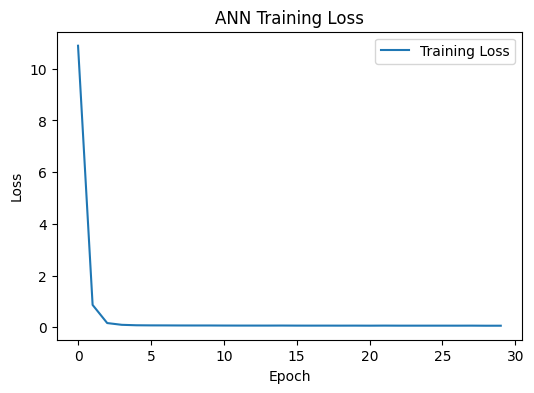

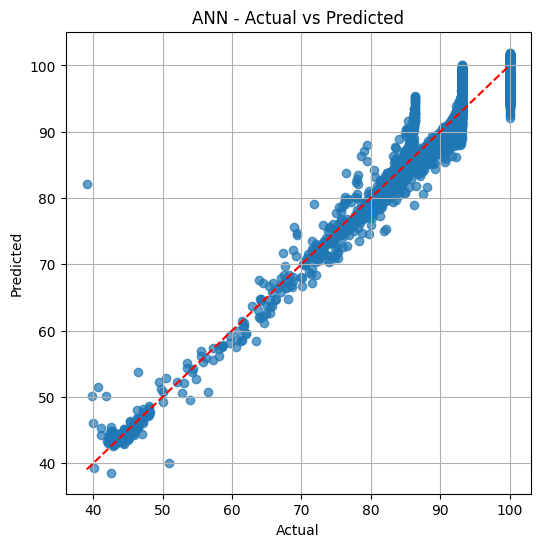

In [9]:
# ======================================
# STEP A: Artificial Neural Network (PyTorch)
# ======================================

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Define ANN model
class ANN_Model(nn.Module):
    def __init__(self, input_dim):
        super(ANN_Model, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

ann_model = ANN_Model(X_train.shape[1])

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(ann_model.parameters())

# Training loop
epochs = 30
batch_size = 32
train_losses = []

for epoch in range(epochs):
    permutation = torch.randperm(X_train_tensor.size()[0])
    epoch_loss = 0
    for i in range(0, X_train_tensor.size()[0], batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        optimizer.zero_grad()
        outputs = ann_model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(X_train_tensor))
    if (epoch+1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")

# Predictions
y_train_pred = ann_model(X_train_tensor).detach().numpy()
y_test_pred = ann_model(X_test_tensor).detach().numpy()

# Metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\n📊 ANN Performance Metrics:")
print(f"Training -> MSE: {mse_train:.4f}, MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")
print(f"Testing  -> MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

# Plot training loss
plt.figure(figsize=(6,4))
plt.plot(train_losses, label='Training Loss')
plt.title('ANN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('ANN - Actual vs Predicted')
plt.grid(True)
plt.show()



📊 Decision Tree Performance Metrics:
Training -> MSE: 0.0000, MAE: 0.0000, RMSE: 0.0000, R²: 1.0000
Testing  -> MSE: 0.0602, MAE: 0.0131, RMSE: 0.2453, R²: 0.9986


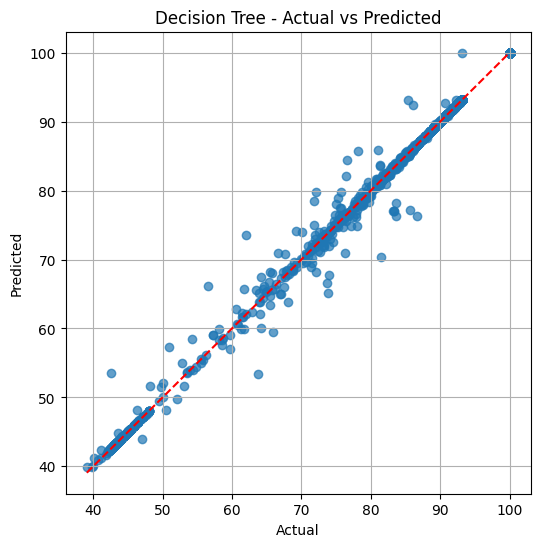

In [10]:
# ======================================
# STEP B: Decision Tree Regression
# ======================================

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Metrics
mse_train_dt = mean_squared_error(y_train, y_train_pred_dt)
mae_train_dt = mean_absolute_error(y_train, y_train_pred_dt)
rmse_train_dt = np.sqrt(mse_train_dt)
r2_train_dt = r2_score(y_train, y_train_pred_dt)

mse_test_dt = mean_squared_error(y_test, y_test_pred_dt)
mae_test_dt = mean_absolute_error(y_test, y_test_pred_dt)
rmse_test_dt = np.sqrt(mse_test_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)

print("\n📊 Decision Tree Performance Metrics:")
print(f"Training -> MSE: {mse_train_dt:.4f}, MAE: {mae_train_dt:.4f}, RMSE: {rmse_train_dt:.4f}, R²: {r2_train_dt:.4f}")
print(f"Testing  -> MSE: {mse_test_dt:.4f}, MAE: {mae_test_dt:.4f}, RMSE: {rmse_test_dt:.4f}, R²: {r2_test_dt:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred_dt, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree - Actual vs Predicted')
plt.grid(True)
plt.show()


Epoch [5/30], Loss: 10994.9311
Epoch [10/30], Loss: 9440.0791
Epoch [15/30], Loss: 8468.6075
Epoch [20/30], Loss: 7386.4053
Epoch [25/30], Loss: 6449.0997
Epoch [30/30], Loss: 6028.0502

📊 LSTM Performance Metrics:
Training -> MSE: 1.1377, MAE: 0.5874, RMSE: 1.0666, R²: 0.9722
Testing  -> MSE: 1.1414, MAE: 0.5859, RMSE: 1.0684, R²: 0.9726


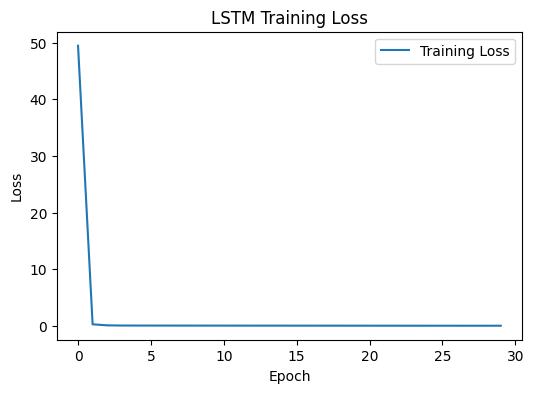

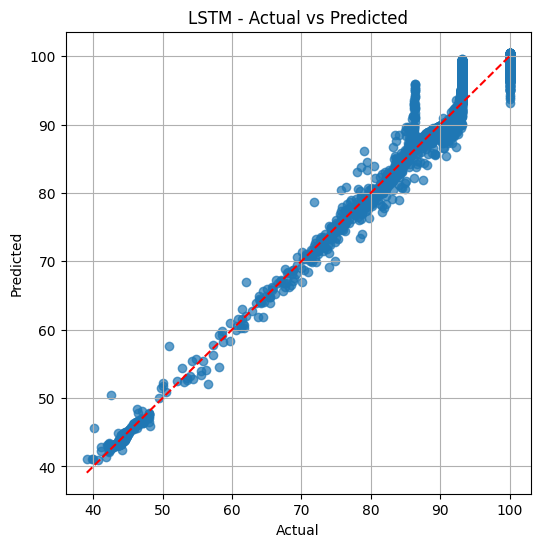

In [11]:
# ======================================
# STEP C: LSTM (PyTorch)
# ======================================

# Reshape input to (samples, timesteps=1, features)
X_train_lstm = X_train_tensor.unsqueeze(1)
X_test_lstm = X_test_tensor.unsqueeze(1)

class LSTM_Model(nn.Module):
    def __init__(self, input_dim, hidden_dim=50, num_layers=1):
        super(LSTM_Model, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

lstm_model = LSTM_Model(input_dim=X_train.shape[1], hidden_dim=50, num_layers=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(lstm_model.parameters())
epochs = 30
batch_size = 32
lstm_losses = []

for epoch in range(epochs):
    permutation = torch.randperm(X_train_lstm.size()[0])
    epoch_loss = 0
    for i in range(0, X_train_lstm.size()[0], batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_lstm[indices], y_train_tensor[indices]

        optimizer.zero_grad()
        outputs = lstm_model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    lstm_losses.append(epoch_loss / len(X_train_lstm))
    if (epoch+1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")

# Predictions
y_train_pred_lstm = lstm_model(X_train_lstm).detach().numpy()
y_test_pred_lstm = lstm_model(X_test_lstm).detach().numpy()

# Metrics
mse_train_lstm = mean_squared_error(y_train, y_train_pred_lstm)
mae_train_lstm = mean_absolute_error(y_train, y_train_pred_lstm)
rmse_train_lstm = np.sqrt(mse_train_lstm)
r2_train_lstm = r2_score(y_train, y_train_pred_lstm)

mse_test_lstm = mean_squared_error(y_test, y_test_pred_lstm)
mae_test_lstm = mean_absolute_error(y_test, y_test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test, y_test_pred_lstm)

print("\n📊 LSTM Performance Metrics:")
print(f"Training -> MSE: {mse_train_lstm:.4f}, MAE: {mae_train_lstm:.4f}, RMSE: {rmse_train_lstm:.4f}, R²: {r2_train_lstm:.4f}")
print(f"Testing  -> MSE: {mse_test_lstm:.4f}, MAE: {mae_test_lstm:.4f}, RMSE: {rmse_test_lstm:.4f}, R²: {r2_test_lstm:.4f}")

# Plot training loss
plt.figure(figsize=(6,4))
plt.plot(lstm_losses, label='Training Loss')
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred_lstm, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LSTM - Actual vs Predicted')
plt.grid(True)
plt.show()
